# Diferencias finitas


Una forma de resolver el problema de Laplace numéricamente es en términos del llamado método de diferencias finitas. En este, el dominio es discretizado introduciendo una grilla rectangular de puntos equiespaciados, separados por una distancia $\varepsilon$ suficientemente pequeña como para que el potencial que esperamos obtener varíe suavemente entre puntos vecinos de la grilla.

Aproximamos entonces el valor de la derivada direccional en un punto,  a lo largo de uno de los ejes de la grilla, como 
$$
\frac{\partial \phi(\vec{x}_0)}{\partial \zeta_i} \approx \frac{\phi(\vec{x}_0+\varepsilon\hat{e}_i) -\phi(\vec{x}_0) }{\varepsilon}
$$
Notemos que en esta expresión, la derivada direccional en un sentido y en el opuesto no tienen por qué coincidir. Una mejor aproximación consistiría en asignar este valor a la derivada direccional *en el punto medio* entre $\vec{x}_i$ y $\vec{x}_i + \varepsilon \hat{e}_i$.

Bajo esta hipótesis, podemos aplicar nuevamente la misma regla para obtener una estimación de la derivada segunda en el punto $x_0$:
$$
\frac{\partial^2 \phi(\vec{x}_0)}{\partial \zeta_i^2} \approx \frac{
\frac{\partial \phi(\vec{x}_0+\varepsilon/2 \check{e}_i)}{\partial \zeta_i} -
\frac{\partial \phi(\vec{x}_0-\varepsilon/2 \check{e}_i)}{\partial \zeta_i}
}{\varepsilon}\approx \frac{\phi(\vec{x}_0+\varepsilon \check{e}_i)+\phi(\vec{x}_0-\varepsilon \check{e}_i)
-2\phi(\vec{x}_0)}{\varepsilon^2}
$$

El laplaciano de $\phi(\vec{x})$ en $x_0$ se aproxima entonces como
$$
\nabla^2 \phi(\vec{x}_0)= \frac{\overline{\phi(\vec{x}_0)}-\phi(\vec{x}_0)}{\varepsilon^2/n} 
$$
donde $n$ es el número de vecinos y $\overline{\phi(\vec{x}_0)}=\frac{\sum_{i,\pm}\phi(\vec{x}_0\pm\varepsilon\check{e}_{i})}{n}$ es el *valor promedio* de $\varphi$ sobre todos los puntos vecinos a $x_0$

De esta manera, una solución para esta discretización de la ecuación de Laplace debe satisfacer que en cada punto, el valor de $\varphi$ coincide con el promedio sobre sus vecinos. 
Una condición semejante podría haberse obtenido partiendo de la propiedad de la Ec. de Laplace continua, que establece que el promedio de $\phi(\vec{x})$ sobre una esfera coincide con el valor que toma en su centro.


Las condiciones de borde tipo Dirichlet se imponen ahora fijando el valor del potencial sobre los puntos de la grilla cercanos a la superficie que la define. De la misma manera, la Ec. de Poisson toma la forma discretizada
$$
\phi(x_0)= \overline{\phi(x_0)} + \frac{\varepsilon^2}{n \epsilon_0} \rho(x_0)
$$

con lo que podemos construir la función de Green del problema remplazando $\rho(x)$ por una carga $Q=\varepsilon^3 \rho(x)$


Las ecuaciones discretizadas definen un problema lineal con restricciones, que se puede resolver en principio por inversión directa. Sin embargo, en la práctica se suele preferir el uso del llamado "método de relajación autoconsistente": se parte de una aproximación a la solución $\phi_0$, que cumple con las condiciones de borde.
A partir de esta aproximación, se produce una nueva aproximación vía el remplazo
$$
\phi_1(\vec{x})=\overline{\phi_0}(\vec{x}) + \frac{\varepsilon^2}{n \epsilon_0} \rho(x_0)
$$

Iterando este procedimiento hasta que $\max_{\vec{x}}|\phi_{n-1}(\vec{x})-\phi_{n}(\vec{x})|$ sea menor que una cierta tolerancia, encontramos la solución buscada.





In [132]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt



# Algunas parametrizaciones de curvas donde definir las condiciones de frontera

In [133]:
def curva_frontera_semicirc1(t):
    t = t * np.pi
    y = int(n/2. * (1.-.5*np.cos(t)))
    x = int(n/2. * (1.+.5*np.sin(t)))
    return (x,y)

def curva_frontera_semicirc2(t):
    t = t * np.pi
    y = int(n/2. * (1.-.5*np.cos(t)))
    x = int(n/2. * (1.-.5*np.sin(t)))
    return (x,y)



def curva_frontera_quart_circ1(t):
    t = t * np.pi
    return (int(0.25 * n * np.cos(t)), int(0.25 * n * np.sin(t)))

def curva_frontera_quart_circ2(t):
    t = t * np.pi
    return (int(n-0.25 * n * np.cos(t)), int(n-0.25 * n * np.sin(t)))


def curva_frontera_rect1(t):
    t = t * np.pi
    if t< .25* 3.1416:        
        x = .25
        y = .5 + .25*np.tan(t)
    elif t> .75* 3.1416:
        x = .75
        y = .5 - .25*np.tan(t)
    else:
        x = .5 - .25/np.tan(t)
        y = .75
    return (int(n*x),int(n*y))


def curva_frontera_rect2(t):
    t = t * np.pi
    if t< .25* 3.1416:        
        x = .25
        y = .5 - .25*np.tan(t)
    elif t> .75* 3.1416:
        x = .75
        y = .5 + .25*np.tan(t)
    else:
        x = .5 - .25/np.tan(t)
        y = .25
    return (int(n*x),int(n*y))


def curva_frontera_tri1(t):
    x = 0.25+.5*t
    y = .5 * (1- 1./np.sqrt(12.)) 
    return (int(n*x),int(n*y))

def curva_frontera_tri2(t):
    x = 0.25+.5*t
    t = np.abs(.5-t)
    y = .5 * (1- 1./np.sqrt(12.))  + np.sqrt(.75)*(.5-t)
    return (int(n*x),int(n*y))


# Parámetros

In [135]:

lado=10 # tamaño físico del sistema (en cm, por ejemplo)
n=50    # número de puntos  en cada dirección 



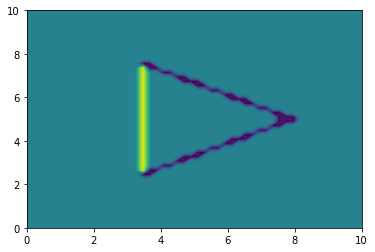

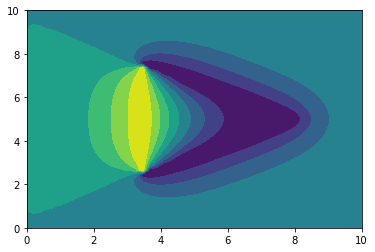

0.0512718324071463


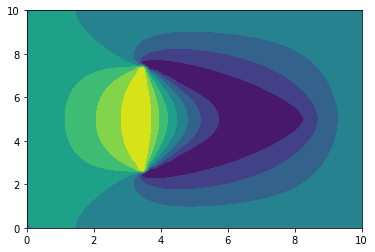

0.0


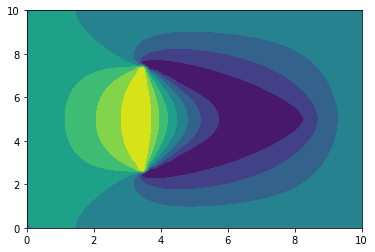

0.0


In [139]:


#Armamos una grilla de nxn llena de ceros

dominio = np.zeros((n,n))
curva_frontera1 = curva_frontera_tri1
curva_frontera2 = curva_frontera_tri2

ptsfrontera1 = [ curva_frontera1(t) for t in np.linspace(0.,1.,2 * n)]
ptsfrontera2 = [ curva_frontera2(t) for t in np.linspace(0.,1.,2 * n)]
valsfrontera1=[1. for p in ptsfrontera1]
valsfrontera2=[-1. for p in ptsfrontera2]

ptsfrontera = ptsfrontera1 + ptsfrontera2 
valsfrontera = valsfrontera1 + valsfrontera2

for p,v in zip(ptsfrontera,valsfrontera):
    if 0<p[0]<n and 0<p[1]<n:
        dominio[p[0],p[1]] = v
    
    
X, Y = np.meshgrid(np.linspace(0,lado,n),np.linspace(0,lado,n))
plt.contour(X, Y,dominio)


def iterdom(dominio):
    newdominio = dominio.copy()
    for nx in range(1,n-1):
        for ny in range(1,n-1):
            newdominio[nx, ny] =  .25 * (dominio[nx + 1 ,ny] + 
                                      dominio[nx-1,ny] + 
                                      dominio[nx,ny+1] + 
                                      dominio[nx,ny-1])
    for p in ptsfrontera:
        if 0<p[0]<n and 0<p[1]<n:
            newdominio[p[0], p[1]] =  dominio[p[0], p[1]]

    err = (newdominio - dominio).flatten()
    err = np.sqrt(err.dot(err))
    return (newdominio,err)


plt.contourf(X, Y, dominio)
plt.show()


for i in range(100):
    dominio,err = iterdom(dominio)

plt.contourf(X, Y, dominio)
plt.show()
print(err)

for i in range(5000):
    dominio,err = iterdom(dominio)

plt.contourf(X, Y, dominio)
plt.show()
print(err)

for i in range(200):
    dominio,err = iterdom(dominio)

plt.contourf(X, Y, dominio)
plt.savefig("equipot.svg")
plt.show()
print(err)


Debido a que el promedio siempre se toma a primeros vecinos, partir de una solución con un potencial nulo salvo en los puntos que definen la condición de frontera, implica que la convergencia llevará una cantidad de pasos proporcional al tamaño de la grilla. Podemos mejorar esta convergencia si partimos de una mejor aproximación de la solución. 

Problema: Construir un algoritmo que resuelva el problema para un n=n0 pequeño (ej, n0=10), y a partir de esa solución, construya la grilla inicial para resolver el problema con un n1=2*n